# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [28]:
df = pd.read_csv('hasil_clustering.csv')
df.head()

,city_name,latitude,longitude,country,population,cluster
0,Monaco,43.7396,7.4069,Monaco,36371.0,3
1,Douglas,54.1500,-4.4819,Isle Of Man,35854.0,3
2,Saint Helier,49.1833,-2.1167,Jersey,33522.0,3
3,Vaduz,47.1415,9.5215,Liechtenstein,36281.0,3
4,George Town,19.2866,-81.3744,Cayman Islands,27704.0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city_name   24803 non-null  object 
 1   latitude    24803 non-null  float64
 2   longitude   24803 non-null  float64
 3   country     24803 non-null  object 
 4   population  24803 non-null  float64
 5   cluster     24803 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [30]:
df.isnull().sum()

city_name     0
latitude      0
longitude     0
country       0
population    0
cluster       0
dtype: int64

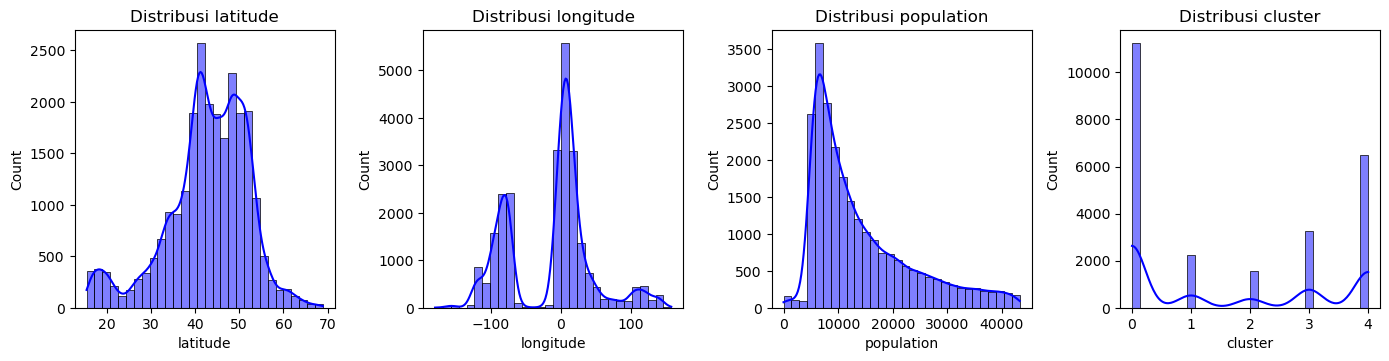

In [31]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [32]:
df.columns.tolist()

['city_name ', 'latitude', 'longitude', 'country', 'population', 'cluster']

In [33]:
df.columns = df.columns.str.strip()

In [34]:
df.columns.tolist()

['city_name', 'latitude', 'longitude', 'country', 'population', 'cluster']

In [35]:
print("\nTipe data setiap kolom:")
print(df.dtypes)


Tipe data setiap kolom:
city_name      object
latitude      float64
longitude     float64
country        object
population    float64
cluster         int64
dtype: object


In [36]:
df = df.drop(columns=['city_name'])

In [37]:
if df['country'].dtype == 'object':
    le = LabelEncoder()
    df['country'] = le.fit_transform(df['country'])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [38]:
X = df.drop(columns=['cluster'])  
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(19842, 4), y_train=(19842,)
Test set shape: X_test=(4961, 4), y_test=(4961,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [22]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),  
        'Recall': recall_score(y_test, y_pred, average='macro'),  
        'F1-Score': f1_score(y_test, y_pred, average='macro')  
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
}
        
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
    
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

                Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest (RF)  0.993953   0.988127  0.989366  0.988736


In [24]:
cm = results['Random Forest (RF)']['Confusion Matrix']

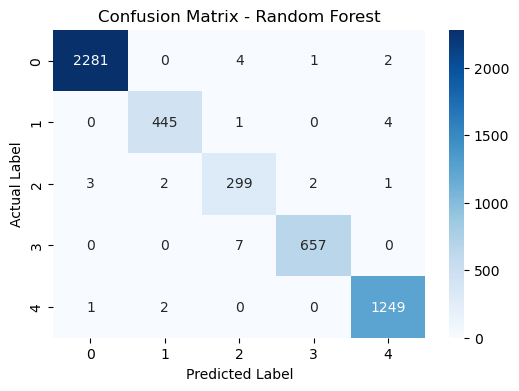

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [26]:
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Akurasi Training: {train_score:.4f}")
print(f"Akurasi Testing : {test_score:.4f}")

Akurasi Training: 1.0000
Akurasi Testing : 0.9940


## Kelas 0 : sangat kuat, hampir tidak ada error.

## Kelas 1 dan 4: juga sangat baik, prediksi akurat, hanya kesalahan kecil ke kelas tetangga.

## Kelas 2: sedikit lebih banyak error dibanding yang lain (salah ke kelas 0, 1, 3, dan 4), tapi masih wajar.

## Kelas 3: hampir sempurna, hanya 7 salah ke kelas 2.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.